## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Etsy Top Sellers Data_Prepared v3.csv'))

In [5]:
df.shape

(10000, 26)

In [6]:
df.head()

,Unnamed: 0,shop_id,shop_name,url,shop_create_date,month_create,year_create,shop_update_date,sold_count,additional_customization,...,average_rating,total_rating_count,average_rating_count,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions
0,0,6923427,kawaiistickers4you,https://www.etsy.com/shop/kawaiistickers4you,5/18/2012,May,2012,1643091607,27723,False,...,1.0,9628,1,False,True,"[193, 105, 99, 129, 215, 220, 128, 103, 165, 1...",True,True,True,NaN
1,1,5242648,JustForMeSewing,https://www.etsy.com/shop/JustForMeSewing,10/4/2010,October,2010,1632363895,39900,False,...,5.0,5470,1,True,False,"[209, 0, 79, 123, 61, 220]",True,True,True,NaN
2,2,5593341,SwellAndGrand,https://www.etsy.com/shop/SwellAndGrand,10/4/2010,October,2010,1640184600,33696,False,...,5.0,4595,1,True,False,"[0, 209]",True,True,True,NaN
3,3,6441254,PrettyThingsSupplies,https://www.etsy.com/shop/PrettyThingsSupplies,7/30/2011,July,2011,1647391292,29155,False,...,5.0,7851,1,True,False,"[79, 105, 93, 103, 61, 123, 91, 209, 0, 193, 1...",True,True,True,NaN
4,4,6176258,KangarooCare,https://www.etsy.com/shop/KangarooCare,1/17/2011,January,2011,1647708638,25779,True,...,5.0,3975,1,True,False,"[131, 191, 148, 189, 145, 165, 118, 100, 272, ...",True,True,True,NaN


In [7]:
# Removing categorical columns / saving only cols for cluster analysis
df_2 = df[['sold_count','active_listing_count','favorites_count','total_rating_count']]

In [8]:
df_2.head()

,sold_count,active_listing_count,favorites_count,total_rating_count
0,27723,2,6931,9628
1,39900,2,12500,5470
2,33696,5,13407,4595
3,29155,0,4649,7851
4,25779,12,12096,3975


In [14]:
# Checking if the variable scales are comparable to not bias the results
# active_listing_count has a smaller range than the other variables but it doesn't feel overly drastic.
# will try running as is and then make adjustments as needed.
df_2.describe()

,sold_count,active_listing_count,favorites_count,total_rating_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,5.348419e+04,851.312800,7625.960200,8471.473400
std,6.216968e+04,1855.144018,9812.055333,10895.584957
min,2.272900e+04,0.000000,88.000000,411.000000
25%,2.806850e+04,167.000000,2388.000000,3853.500000
50%,3.675000e+04,419.000000,4744.000000,5871.000000
75%,5.630550e+04,940.000000,9247.500000,9281.000000
max,1.839198e+06,83954.000000,258218.000000,267763.000000


In [15]:
df_2.shape

(10000, 4)

### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-40830922135586.44,
 -20190057200233.277,
 -11973037475329.11,
 -7649989797513.209,
 -5198433446394.644,
 -3728151041017.809,
 -3037075818182.0415,
 -2612820624341.711,
 -2255926672036.3257]

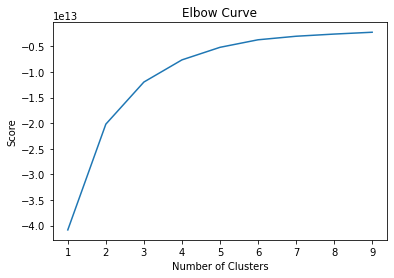

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 6.5 Answer #4.  There are steady inclines between the first four clusters, with only a small incline between 4 and 5 before leveling off, so I will try 4 clusters to see how the results look.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\rstev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [14]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\rstev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\rstev\AppData\Local\Temp/ipykernel_48224/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [15]:
df_2.head()

,sold_count,active_listing_count,favorites_count,total_rating_count,clusters
0,27723,2,6931,9628,1
1,39900,2,12500,5470,1
2,33696,5,13407,4595,1
3,29155,0,4649,7851,1
4,25779,12,12096,3975,1


In [16]:
df_2['clusters'].value_counts() 
# Since one cluster only has 6 records, that tells me there might be outliers or something amiss. 
# I will run the scatterplot to visualize the clusters.

1    8763
0    1124
2     107
3       6
Name: clusters, dtype: int64

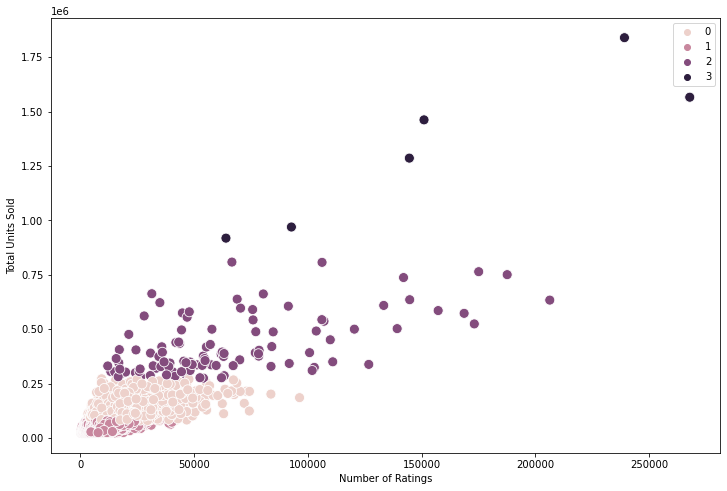

In [17]:
# Plot the clusters for the "sold_count" and "total_rating_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['total_rating_count'], y=df_2['sold_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Ratings') # Label x-axis.
plt.ylabel('Total Units Sold') # Label y-axis.
plt.show()

### The scatterplot above shows that one cluster with only 6 records are the outliers. I think they will need to be capped or removed.
### From the other clusters, I can see that cluster 0 has the lowest number of units sold and are also among the lowest for number of ratings. Then cluster 2 is in the middle with units sold, but cover a low to medium range of number of ratings. And cluster 1 has the most units sold outside of the outliers in cluster 3, but have quite a wide range of number of ratings.

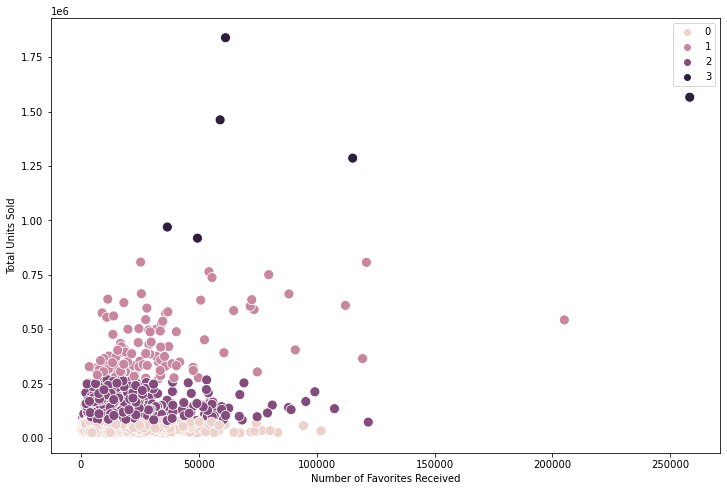

In [30]:
# Plot the clusters for the "favorites_count" and "sold_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['favorites_count'], y=df_2['sold_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Favorites Received') 
plt.ylabel('Total Units Sold') 
plt.show()

### The total units sold and number of favorites received scatterplot shows a similar story, but there is a wider range of number of favorites received, which tells me that variable isn't a strong indicator of how many units a shop will sell. 

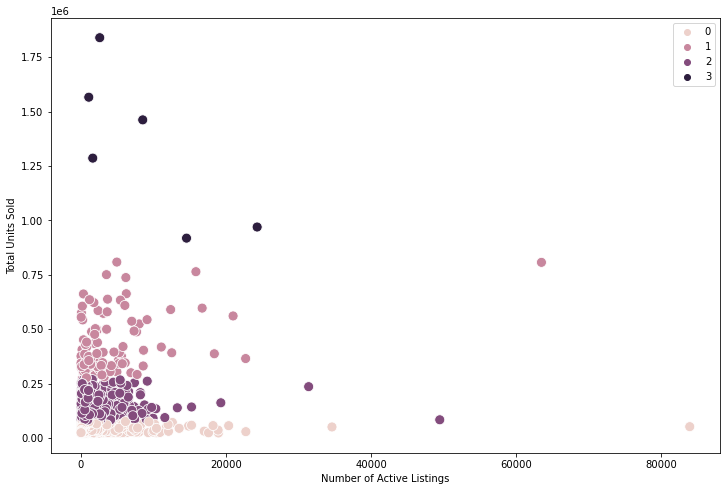

In [31]:
# Plot the clusters for the "active_listing_count" and "sold_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['active_listing_count'], y=df_2['sold_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Active Listings') 
plt.ylabel('Total Units Sold') 
plt.show()

### The relationship between number of active listings and total units sold is weak. I will try running kmeans without this variable.

In [32]:
df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'pink'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\rstev\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rstev\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
df_2.groupby('cluster').agg({'sold_count':['mean', 'median'], 
                         'total_rating_count':['mean', 'median'], 
                         'favorites_count':['mean', 'median'],
                          'active_listing_count':['mean', 'median']})

sold_count            total_rating_count            \
                     mean     median               mean    median   
cluster                                                             
dark purple  1.339982e+06  1373744.0      159899.333333  147835.5   
light pink   3.879282e+04    34083.0        6214.252996    5386.0   
pink         4.228210e+05   376174.0       64866.476636   54205.0   
purple       1.259953e+05   113124.0       19892.460854   16952.0   

            favorites_count          active_listing_count          
                       mean   median                 mean  median  
cluster                                                            
dark purple    96690.333333  60226.0          8771.000000  5547.0  
light pink      6394.655027   4227.0           724.680589   389.0  
pink           33430.467290  26487.0          4282.570093  2268.0  
purple         14293.628114  10382.0          1469.653915   776.0

# Rerunning kmeans with outliers removed and active_listing_count excluded

In [18]:
df_3 = df_2[['sold_count','favorites_count','total_rating_count']]

In [19]:
df_3.head()

,sold_count,favorites_count,total_rating_count
0,27723,6931,9628
1,39900,12500,5470
2,33696,13407,4595
3,29155,4649,7851
4,25779,12096,3975


In [20]:
df_3 = df_3[df_3['sold_count'] <=900000] 

In [21]:
df_3.describe()

,sold_count,favorites_count,total_rating_count
count,9994.000000,9994.000000,9994.000000
mean,52711.829998,7572.489494,8380.562137
std,53006.467284,9384.740278,10090.419690
min,22729.000000,88.000000,411.000000
25%,28063.250000,2388.000000,3852.000000
50%,36735.500000,4739.500000,5870.000000
75%,56271.500000,9235.750000,9268.500000
max,808249.000000,205046.000000,206287.000000


In [22]:
df_3.shape

(9994, 3)

### The elbow technique

In [23]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [24]:
score = [kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-29974757907569.52,
 -13351465809957.32,
 -6917766710921.571,
 -4672215951180.216,
 -3263275084346.269,
 -2577616164709.5283,
 -2171509474536.6284,
 -1949489186992.66,
 -1758640353136.289]

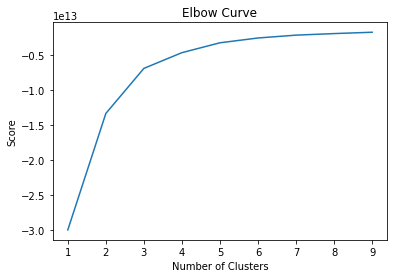

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I will use 3 clusters here as the incline from 3 to 4 is not steep.

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [27]:
# Fit the k-means object to the data.

kmeans.fit(df_3)

C:\Users\rstev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [28]:
df_3['clusters'] = kmeans.fit_predict(df_3)

C:\Users\rstev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [35]:
df_3.head()

,sold_count,favorites_count,total_rating_count,clusters
0,27723,6931,9628,0
1,39900,12500,5470,0
2,33696,13407,4595,0
3,29155,4649,7851,0
4,25779,12096,3975,0


In [30]:
df_3['clusters'].value_counts() 
# The clusters are slightly better in this version, but the sizes still vary greatly. 

0    8766
2    1122
1     106
Name: clusters, dtype: int64

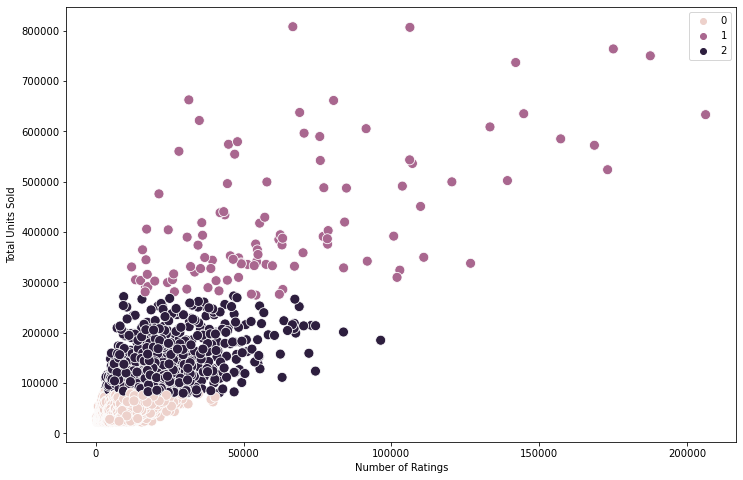

In [31]:
# Plot the clusters for the "sold_count" and "total_rating_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['total_rating_count'], y=df_3['sold_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of Ratings') 
plt.ylabel('Total Units Sold') 
plt.show()

### So ultimately, the results are pretty much the same as the original run in that there is one cluster with low sales and low number of ratings, a group clustered close together in the middle, and then the third group much more spread out. In conclusion, I think the data points vary a lot, with more factors in play than just the ones being tested here. Clustering analysis with sold count, number of ratings, and number of favorites does not seem like the best way to predict Etsy sales.

In [36]:
# Export
df_3.to_csv(os.path.join(path, 'Data', 'Etsy Top Sellers Data_Prepared v4.csv'))